# 1. Introduction

本タスクは，顔の表情に示された感情に基づいて，各顔を以下の7つのカテゴリのいずれかに分類することです．データは，48×48ピクセルのグレースケールの顔画像で構成されています．これらの顔は全て中央に位置し，各画像内でほぼ同じスペースを占めるように登録されています．データは
[こちら](https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data) から．

|  category  |  emotion  |
| :----: | :----: |
|  0  |  Angry  |
|  1  |  Disgust  |
|  2  |  Fear  |
|  3  |  Happy  |
|  4  |  Sad  |
|  5  |  Surprise  |
|  6  |  Neutral  |

# 2. Libraries

必要なライブラリをインポートします．

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [35]:
import os
# os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

# 3. Load & Overview

データをデータフレームに落とし込み，応答変数の分布を確認します．

In [36]:
path = './challenges-in-representation-learning-facial-expression-recognition-challenge/train.csv'
df = pd.read_csv(path, na_filter=False)
df

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...
28704,2,84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...
28705,0,114 112 113 113 111 111 112 113 115 113 114 11...
28706,4,74 81 87 89 95 100 98 93 105 120 127 133 146 1...
28707,0,222 227 203 90 86 90 84 77 94 87 99 119 134 14...


In [37]:
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

In [38]:
df['emotion'].value_counts(sort=False).rename(index=dict(zip(list(range(7)), emotions)))

Angry       3995
Disgust      436
Fear        4097
Happy       7215
Sad         4830
Surprise    3171
Neutral     4965
Name: emotion, dtype: int64

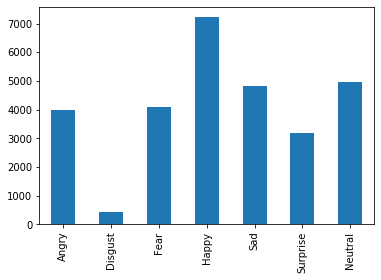

In [39]:
df['emotion'].value_counts(sort=False).rename(index=dict(zip(list(range(7)), emotions))).plot(kind='bar')

In [40]:
df = df[df['emotion']!=1]

In [41]:
df

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...
28704,2,84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...
28705,0,114 112 113 113 111 111 112 113 115 113 114 11...
28706,4,74 81 87 89 95 100 98 93 105 120 127 133 146 1...
28707,0,222 227 203 90 86 90 84 77 94 87 99 119 134 14...


In [42]:
df['emotion'].value_counts(sort=False).rename(index=dict(zip(list(range(7)), emotions)))

Angry       3995
Fear        4097
Happy       7215
Sad         4830
Surprise    3171
Neutral     4965
Name: emotion, dtype: int64

# 4. Functions

サンプル表示，学習データ成形に必要な関数を定義します．

In [43]:
def prepare_df(df):
    img_array = np.zeros(shape=(len(df), 48, 48))
    img_label = np.array(list(map(int, df['emotion'])))
    for i, row in enumerate(df.index):
        image = np.fromstring(df.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        img_array[i] = image
        
    return img_array, img_label

def plot_examples(label=0):
    fig, ax = plt.subplots(1, 5, figsize=(25, 12))
    fig.subplots_adjust(hspace = .2, wspace=.2)
    ax = ax.ravel()
    for i in range(5):
        idx = df[df['emotion']==label].index[i]
        ax[i].imshow(images[idx][:,:,0], cmap='gray')
        ax[i].set_title(emotions[labels[idx].argmax()])
        ax[i].set_xticklabels([])
        ax[i].set_yticklabels([])

In [44]:
img_array, img_label = prepare_df(df)
images = img_array.reshape((img_array.shape[0], 48, 48, 1)).astype('float32')/255
labels = to_categorical(img_label)

In [45]:
def gray_to_rgb(img):
  w, h = img.shape
  ret = np.empty((w, h, 3), dtype=np.uint8)
  ret[:, :, 2] = ret[:, :, 1] = ret[:, :, 0] = img
  return ret

def convert_to_image(pixels, mode='save', t='gray'):
  if type(pixels) == str:
      pixels = np.array([int(i) for i in pixels.split()])
  if mode == 'show':
    if t == 'gray':
      return pixels.reshape(48, 48)
    else:
      return gray_to_rgb(pixels.reshape(48, 48))
  else:
      return pixels

In [46]:
df

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...
28704,2,84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...
28705,0,114 112 113 113 111 111 112 113 115 113 114 11...
28706,4,74 81 87 89 95 100 98 93 105 120 127 133 146 1...
28707,0,222 227 203 90 86 90 84 77 94 87 99 119 134 14...


In [47]:
df.loc[:, 'pixels'] = df.copy()['pixels'].apply(lambda x : convert_to_image(x, mode='show', t='gray'))
df

,emotion,pixels
0,0,"[[70, 80, 82, 72, 58, 58, 60, 63, 54, 58, 60, ..."
1,0,"[[151, 150, 147, 155, 148, 133, 111, 140, 170,..."
2,2,"[[231, 212, 156, 164, 174, 138, 161, 173, 182,..."
3,4,"[[24, 32, 36, 30, 32, 23, 19, 20, 30, 41, 21, ..."
4,6,"[[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 15, 2..."
...,...,...
28704,2,"[[84, 85, 85, 85, 85, 85, 85, 85, 86, 86, 86, ..."
28705,0,"[[114, 112, 113, 113, 111, 111, 112, 113, 115,..."
28706,4,"[[74, 81, 87, 89, 95, 100, 98, 93, 105, 120, 1..."
28707,0,"[[222, 227, 203, 90, 86, 90, 84, 77, 94, 87, 9..."


In [48]:
df_dataAug = df.copy()
df_dataAug['pixels'] = df_dataAug['pixels'].apply(lambda x: x[:, ::-1])

In [49]:
df_dataAug

,emotion,pixels
0,0,"[[41, 43, 52, 61, 57, 56, 62, 66, 79, 95, 107,..."
1,0,"[[120, 140, 129, 119, 123, 163, 132, 95, 104, ..."
2,2,"[[16, 27, 44, 36, 56, 94, 131, 137, 135, 139, ..."
3,4,"[[173, 172, 173, 176, 182, 187, 190, 190, 188,..."
4,6,"[[25, 24, 27, 25, 5, 7, 17, 21, 38, 48, 58, 83..."
...,...,...
28704,2,"[[87, 86, 86, 85, 85, 85, 84, 85, 85, 85, 85, ..."
28705,0,"[[147, 112, 83, 98, 81, 114, 110, 88, 80, 99, ..."
28706,4,"[[192, 191, 189, 187, 190, 192, 194, 193, 192,..."
28707,0,"[[122, 132, 138, 146, 155, 160, 158, 162, 166,..."


In [50]:
df = pd.concat([df, df_dataAug])

In [51]:
df

,emotion,pixels
0,0,"[[70, 80, 82, 72, 58, 58, 60, 63, 54, 58, 60, ..."
1,0,"[[151, 150, 147, 155, 148, 133, 111, 140, 170,..."
2,2,"[[231, 212, 156, 164, 174, 138, 161, 173, 182,..."
3,4,"[[24, 32, 36, 30, 32, 23, 19, 20, 30, 41, 21, ..."
4,6,"[[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 15, 2..."
...,...,...
28704,2,"[[87, 86, 86, 85, 85, 85, 84, 85, 85, 85, 85, ..."
28705,0,"[[147, 112, 83, 98, 81, 114, 110, 88, 80, 99, ..."
28706,4,"[[192, 191, 189, 187, 190, 192, 194, 193, 192,..."
28707,0,"[[122, 132, 138, 146, 155, 160, 158, 162, 166,..."


In [52]:
df['emotion'].value_counts(sort=False).rename(index=dict(zip(list(range(7)), emotions)))

Angry        7990
Fear         8194
Happy       14430
Sad          9660
Surprise     6342
Neutral      9930
Name: emotion, dtype: int64

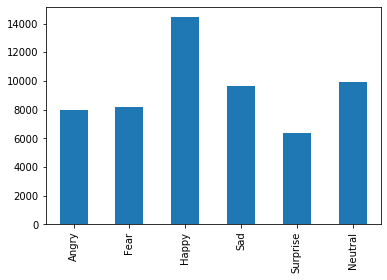

In [53]:
df['emotion'].value_counts(sort=False).rename(index=dict(zip(list(range(7)), emotions))).plot(kind='bar')

In [54]:
X_train, X_val, y_train, y_val = train_test_split(df["pixels"], df["emotion"], test_size=0.2, random_state=1)

X_train = np.array(list(X_train[:]), dtype=np.float)
X_val = np.array(list(X_val[:]), dtype=np.float)

y_train = np.array(list(y_train[:]), dtype=np.float)
y_val = np.array(list(y_val[:]), dtype=np.float)

X_train = X_train.reshape(X_train.shape[0], 48, 48, 1) 
X_val = X_val.reshape(X_val.shape[0], 48, 48, 1)

# 5. Data Examples

各表情のサンプルを以下に示します．

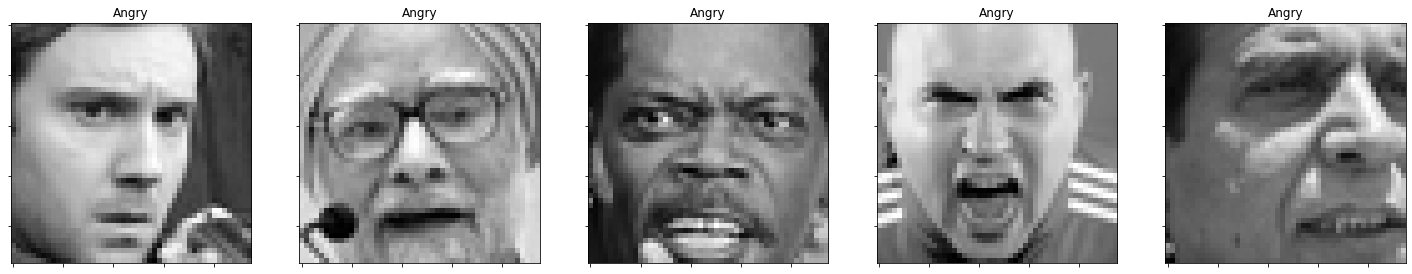

In [55]:
# Angry
plot_examples(label=0)

In [56]:
# Disgust
# This expression is not a candidate due to insufficient sample size
# plot_examples(label=1)

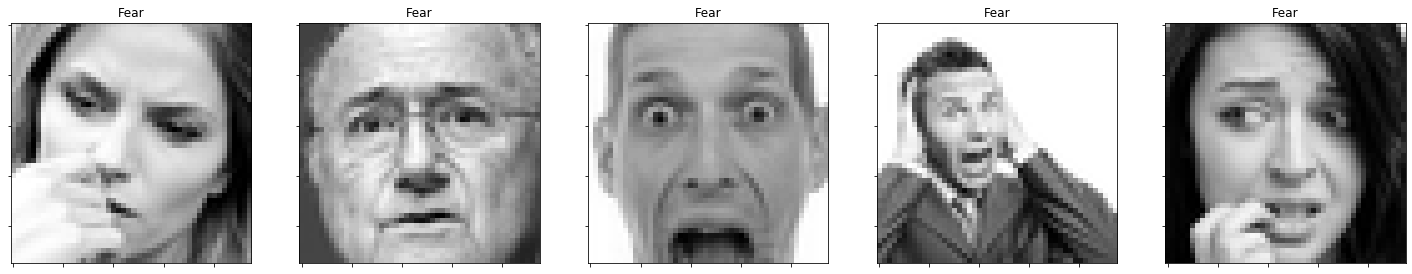

In [57]:
# Fear
plot_examples(label=2)

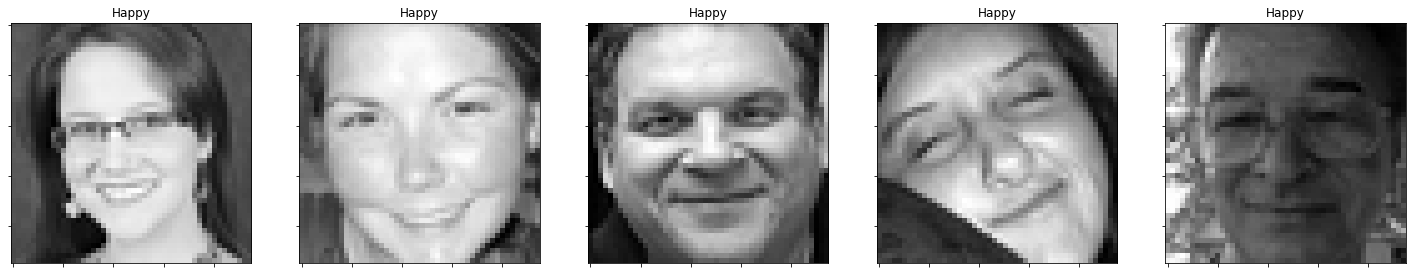

In [58]:
# Happy
plot_examples(label=3)

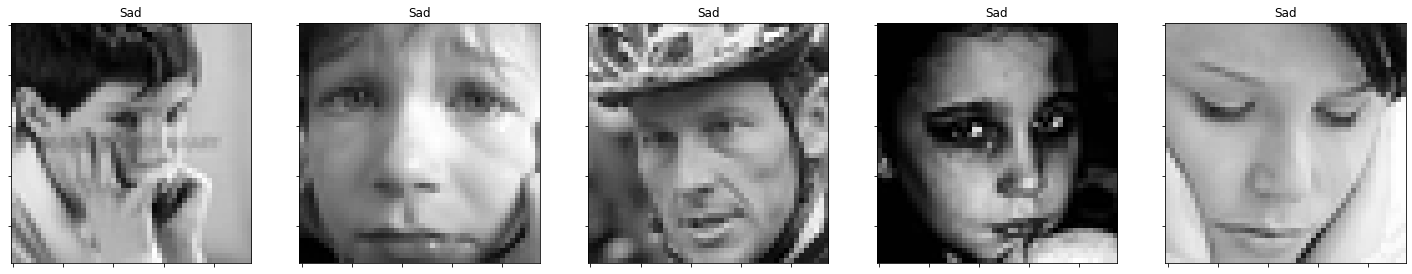

In [59]:
# Sad
plot_examples(label=4)

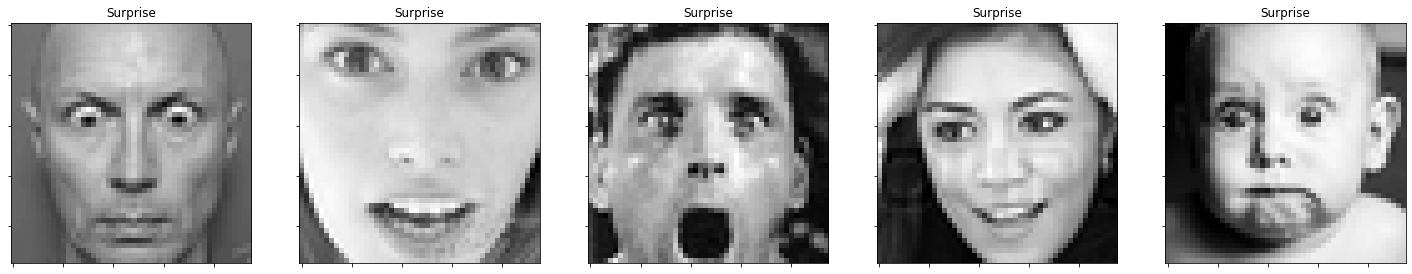

In [60]:
# Surprise
plot_examples(label=5)

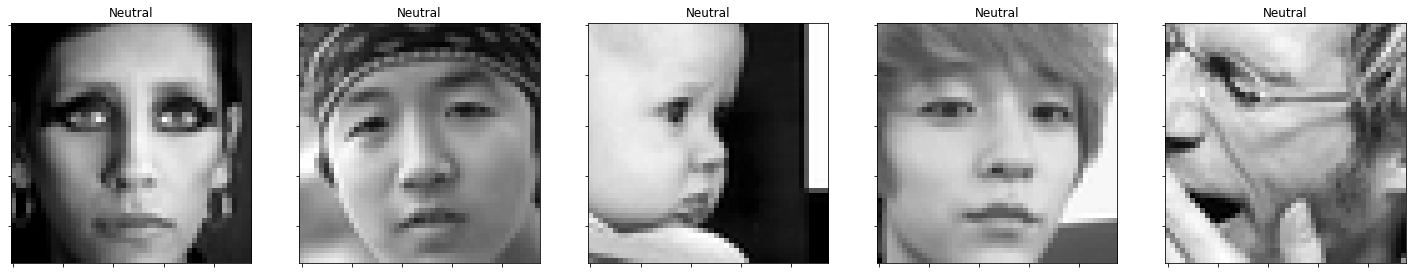

In [61]:
# Neutral
plot_examples(label=6)

# 6. Model

以下のCNNモデルを構成し，学習を行ないます．

In [62]:
tf.compat.v1.set_random_seed(0)

In [63]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), 
                        activation='relu', input_shape=(48, 48, 1)),
    keras.layers.BatchNormalization(axis=1),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.BatchNormalization(axis=1),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.BatchNormalization(axis=1),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    keras.layers.BatchNormalization(axis=1),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(7, activation='softmax')
])

In [64]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [65]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 batch_normalization_4 (Batc  (None, 46, 46, 32)       184       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 23, 23, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 21, 21, 64)      

In [ ]:
fitting = model.fit(X_train, y_train, epochs=500, batch_size=2048, validation_data=(X_val,y_val))

Epoch 1/500
23/23 [==============================] - 104s 5s/step - loss: 1.8145 - accuracy: 0.2225 - val_loss: 4.0753 - val_accuracy: 0.1156
Epoch 2/500
23/23 [==============================] - 94s 4s/step - loss: 1.7575 - accuracy: 0.2453 - val_loss: 2.5238 - val_accuracy: 0.1154
Epoch 3/500
23/23 [==============================] - 97s 4s/step - loss: 1.7499 - accuracy: 0.2481 - val_loss: 2.0099 - val_accuracy: 0.1203
Epoch 4/500
23/23 [==============================] - 97s 4s/step - loss: 1.7428 - accuracy: 0.2532 - val_loss: 1.7847 - val_accuracy: 0.2131
Epoch 5/500
23/23 [==============================] - 99s 4s/step - loss: 1.7331 - accuracy: 0.2575 - val_loss: 1.7439 - val_accuracy: 0.2524
Epoch 6/500
23/23 [==============================] - 101s 4s/step - loss: 1.7114 - accuracy: 0.2737 - val_loss: 1.7506 - val_accuracy: 0.2572
Epoch 7/500
23/23 [==============================] - 101s 4s/step - loss: 1.6499 - accuracy: 0.3193 - val_loss: 1.7235 - val_accuracy: 0.2740
Epoch 8/50

In [ ]:
model.save('face_emotion.h5')

# 7. Analyze Convergence

エポックごとのLossとAccuracyの遷移を表示します．

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(fitting.history['loss'])
ax[0].plot(fitting.history['val_loss'])
ax[1].plot(fitting.history['accuracy'])
ax[1].plot(fitting.history['val_accuracy'])

ax[0].legend(['Train', 'Test'])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[1].legend(['Train', 'Test'])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
    
plt.tight_layout()

# 8. Emotions from My Face?

学習したモデルで，実際に自分の顔写真を使って予測してみました．

In [ ]:
def predict(img_path):
    gray = Image.open(img_path).convert('L')
    img_resize = gray.resize((48, 48))
    plt.imshow(img_resize, cmap='gray')
    img = np.array(img_resize).reshape(1, 48, 48, 1)

    pre = model.predict(img).reshape(7)
    arg = np.argsort(pre)[::-1]
    for i in range(3):
        print('{}.{}: {}'.format(i + 1, emotions[arg[i]], pre[arg[i]]))

In [ ]:
predict('./img/square/test.jpg')

In [ ]:
predict('./img/square/test2.jpg')

In [ ]:
predict('./img/square/test3.jpg')

In [ ]:
gray = Image.open('./img/square/test3.jpg').convert('L')
img_resize = gray.resize((48, 48))

img = np.array(img_resize)[:, ::-1]

plt.imshow(img, cmap='gray')
img = img.reshape(1, 48, 48, 1)

pre = model.predict(img).reshape(7)
arg = np.argsort(pre)[::-1]
for i in range(3):
    print('{}.{}: {}'.format(i + 1, emotions[arg[i]], pre[arg[i]]))